In [3]:
import numpy as np 
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')
#this last library is used to ignore the warning or to avoid the warning 

In [4]:
df=pd.read_csv("questions.csv")

In [5]:
df.shape

(404351, 6)

In [6]:
df.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [8]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df['is_duplicate'].value_counts()
#imbalance h data todha sa 


is_duplicate
0    255045
1    149306
Name: count, dtype: int64

<Axes: xlabel='is_duplicate'>

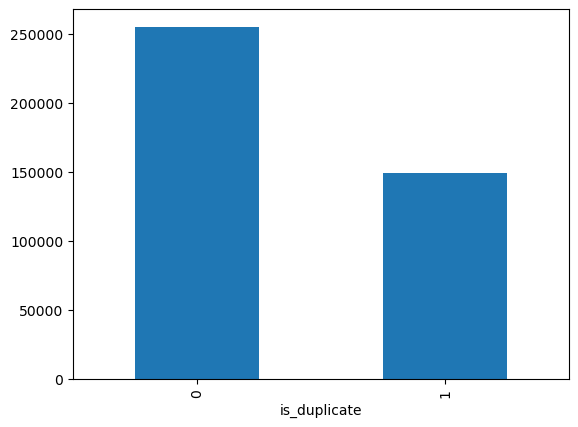

In [11]:
df['is_duplicate'].value_counts().plot(kind='bar')

In [12]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
#yaha toh humne dono columns ko add kiya list m or fir humne np.unique laga ke unique no. nikal liye 

Number of unique questions 789801


In [13]:
qid.value_counts()>1
#ye vo h jo ek baar se jaiada baar aaye hai 

65333      True
7863       True
147324     True
2628       True
196396     True
          ...  
530739    False
530741    False
530743    False
530745    False
789801    False
Name: count, Length: 789801, dtype: bool

In [14]:
x=qid.value_counts()>1
print("number of repeating questions",x[x].shape[0])

number of repeating questions 13698


In [15]:
new_df=df.sample(30000,random_state=2)

In [16]:
new_df.head()

id    qid1    qid2  \
339499  339499  665522  665523   
289521  289521  568878  568879   
4665      4665    9325    9326   
54203    54203  107861  107862   
132566  132566  262554   91499   

                                                question1  \
339499  Why was Cyrus Mistry removed as the Chairman o...   
289521  By what age would you think a man should be ma...   
4665    How would an arbitrageur seek to capitalize gi...   
54203       Why did Quora mark my question as incomplete?   
132566  What is it like working with Pivotal Labs as a...   

                                                question2  is_duplicate  
339499         Why did the Tata Sons sacked Cyrus Mistry?             1  
289521  When my wrist is extended I feel a shock and b...             0  
4665    How would an arbitrageur seek to capitalize gi...             0  
54203   Why does Quora detect my question as an incomp...             1  
132566            What's it like to work at Pivotal Labs?             0

In [17]:
def preprocess(q):
    q=str(q).lower().strip()
     # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
     # The pattern '[math]' appears around 900 times in the whole dataset.
    q=q.replace('[math]', '')
    
     # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
     # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
    
    q_decontractions=[]
    for word in q.split():
        if word in contractions:
           word=contractions[word]
        q_decontractions.append(word)
        # we have to change this in string because all the words are in the list in split form 
    q=' '.join(q_decontractions)   
        
    # Removing HTML tags 
    q=BeautifulSoup(q)
    q=q.get_text()
    
    #removing punctuations
    pattern=re.compile('\W')
    q=re.sub(pattern,' ',q).strip()
        
    return q        
    
    

In [18]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [19]:
new_df['question1']=new_df['question1'].apply(preprocess)
new_df['question2']=new_df['question2'].apply(preprocess)

In [20]:
new_df.head()

id    qid1    qid2  \
339499  339499  665522  665523   
289521  289521  568878  568879   
4665      4665    9325    9326   
54203    54203  107861  107862   
132566  132566  262554   91499   

                                                question1  \
339499  why was cyrus mistry removed as the chairman o...   
289521  by what age would you think a man should be ma...   
4665    how would an arbitrageur seek to capitalize gi...   
54203        why did quora mark my question as incomplete   
132566  what is it like working with pivotal labs as a...   

                                                question2  is_duplicate  
339499          why did the tata sons sacked cyrus mistry             1  
289521  when my wrist is extended i feel a shock and b...             0  
4665    how would an arbitrageur seek to capitalize gi...             0  
54203   why does quora detect my question as an incomp...             1  
132566            what is it like to work at pivotal labs             0

In [21]:
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2len']=new_df['question2'].str.len()

In [22]:
new_df.head()

id    qid1    qid2  \
339499  339499  665522  665523   
289521  289521  568878  568879   
4665      4665    9325    9326   
54203    54203  107861  107862   
132566  132566  262554   91499   

                                                question1  \
339499  why was cyrus mistry removed as the chairman o...   
289521  by what age would you think a man should be ma...   
4665    how would an arbitrageur seek to capitalize gi...   
54203        why did quora mark my question as incomplete   
132566  what is it like working with pivotal labs as a...   

                                                question2  is_duplicate  \
339499          why did the tata sons sacked cyrus mistry             1   
289521  when my wrist is extended i feel a shock and b...             0   
4665    how would an arbitrageur seek to capitalize gi...             0   
54203   why does quora detect my question as an incomp...             1   
132566            what is it like to work at pivotal labs             0   

        q1_len  q2len  
339499      57     41  
289521      51    104  
4665       123    122  
54203       44     59  
132566      53     39

In [23]:
new_df['q1_num_words']=new_df['question1'].apply(lambda row:len(row.split(" ")))
new_df['q2_num_words']=new_df['question2'].apply(lambda row:len(row.split(" ")))

In [24]:
new_df.head()

id    qid1    qid2  \
339499  339499  665522  665523   
289521  289521  568878  568879   
4665      4665    9325    9326   
54203    54203  107861  107862   
132566  132566  262554   91499   

                                                question1  \
339499  why was cyrus mistry removed as the chairman o...   
289521  by what age would you think a man should be ma...   
4665    how would an arbitrageur seek to capitalize gi...   
54203        why did quora mark my question as incomplete   
132566  what is it like working with pivotal labs as a...   

                                                question2  is_duplicate  \
339499          why did the tata sons sacked cyrus mistry             1   
289521  when my wrist is extended i feel a shock and b...             0   
4665    how would an arbitrageur seek to capitalize gi...             0   
54203   why does quora detect my question as an incomp...             1   
132566            what is it like to work at pivotal labs             0   

        q1_len  q2len  q1_num_words  q2_num_words  
339499      57     41            11             8  
289521      51    104            11            23  
4665       123    122            42            42  
54203       44     59             8            10  
132566      53     39            11             9

In [25]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)


In [26]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

id    qid1    qid2  \
339499  339499  665522  665523   
289521  289521  568878  568879   
4665      4665    9325    9326   
54203    54203  107861  107862   
132566  132566  262554   91499   

                                                question1  \
339499  why was cyrus mistry removed as the chairman o...   
289521  by what age would you think a man should be ma...   
4665    how would an arbitrageur seek to capitalize gi...   
54203        why did quora mark my question as incomplete   
132566  what is it like working with pivotal labs as a...   

                                                question2  is_duplicate  \
339499          why did the tata sons sacked cyrus mistry             1   
289521  when my wrist is extended i feel a shock and b...             0   
4665    how would an arbitrageur seek to capitalize gi...             0   
54203   why does quora detect my question as an incomp...             1   
132566            what is it like to work at pivotal labs             0   

        q1_len  q2len  q1_num_words  q2_num_words  word_common  
339499      57     41            11             8            6  
289521      51    104            11            23            3  
4665       123    122            42            42           18  
54203       44     59             8            10            6  
132566      53     39            11             9            6

In [27]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [28]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

id    qid1    qid2  \
339499  339499  665522  665523   
289521  289521  568878  568879   
4665      4665    9325    9326   
54203    54203  107861  107862   
132566  132566  262554   91499   

                                                question1  \
339499  why was cyrus mistry removed as the chairman o...   
289521  by what age would you think a man should be ma...   
4665    how would an arbitrageur seek to capitalize gi...   
54203        why did quora mark my question as incomplete   
132566  what is it like working with pivotal labs as a...   

                                                question2  is_duplicate  \
339499          why did the tata sons sacked cyrus mistry             1   
289521  when my wrist is extended i feel a shock and b...             0   
4665    how would an arbitrageur seek to capitalize gi...             0   
54203   why does quora detect my question as an incomp...             1   
132566            what is it like to work at pivotal labs             0   

        q1_len  q2len  q1_num_words  q2_num_words  word_common  word_total  
339499      57     41            11             8            6          19  
289521      51    104            11            23            3          33  
4665       123    122            42            42           18          38  
54203       44     59             8            10            6          18  
132566      53     39            11             9            6          20

In [29]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

id    qid1    qid2  \
339499  339499  665522  665523   
289521  289521  568878  568879   
4665      4665    9325    9326   
54203    54203  107861  107862   
132566  132566  262554   91499   

                                                question1  \
339499  why was cyrus mistry removed as the chairman o...   
289521  by what age would you think a man should be ma...   
4665    how would an arbitrageur seek to capitalize gi...   
54203        why did quora mark my question as incomplete   
132566  what is it like working with pivotal labs as a...   

                                                question2  is_duplicate  \
339499          why did the tata sons sacked cyrus mistry             1   
289521  when my wrist is extended i feel a shock and b...             0   
4665    how would an arbitrageur seek to capitalize gi...             0   
54203   why does quora detect my question as an incomp...             1   
132566            what is it like to work at pivotal labs             0   

        q1_len  q2len  q1_num_words  q2_num_words  word_common  word_total  \
339499      57     41            11             8            6          19   
289521      51    104            11            23            3          33   
4665       123    122            42            42           18          38   
54203       44     59             8            10            6          18   
132566      53     39            11             9            6          20   

        word_share  
339499        0.32  
289521        0.09  
4665          0.47  
54203         0.33  
132566        0.30

In [30]:
#advance features

#  1. Token Features


from nltk.corpus import stopwords

def fetch_token_features(row):
    
    #now we have the full row and we are separating question1 and question2
    q1=row['question1']
    q2=row['question2']
    
    SAFE_DIV=0.0001
    
    STOP_WORDS=stopwords.words("english")
    
    token_features=[0.0]*8
    #this is done because we are going to make 8 features 
    
    
    # Converting the Sentence into Tokens: 
    q1_tokens=q1.split()
    q2_tokens=q2.split()
    
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return token_features
    
    
    # Get the non-stopwords in Questions
    q1_words=set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words=set([word for word in q1_tokens if word not in STOP_WORDS])
    
    
    
    # Get the stopwords in Questions
    q1_stops=set([word for word in q1_tokens if word  in STOP_WORDS])
    q2_stops=set([word for word in q1_tokens if word  in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count=len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
     # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    # NOW we are putting these in formula so that we can have our 8 tokens 
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6]=int(q1_tokens[-1]==q2_tokens[-1])
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features
    

In [31]:
token_features=new_df.apply(fetch_token_features,axis=1)

token_features
#by seeing this we  can say that there are 8 indexes in each row 

339499    [0.9999833336111065, 0.9999833336111065, 0.999...
289521    [0.999980000399992, 0.999980000399992, 0.99998...
4665      [0.9999923077514788, 0.9999923077514788, 0.999...
54203     [0.9999750006249845, 0.9999750006249845, 0.999...
132566    [0.999980000399992, 0.999980000399992, 0.99998...
                                ...                        
228960    [0.9999750006249845, 0.9999750006249845, 0.999...
142894    [0.9999666677777407, 0.9999666677777407, 0.999...
43027     [0.9999750006249845, 0.9999750006249845, 0.999...
154198    [0.9999666677777407, 0.9999666677777407, 0.999...
174228    [0.999980000399992, 0.999980000399992, 0.99998...
Length: 30000, dtype: object

In [32]:
new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))
# giving each column name and adding  it to new_df

In [33]:
new_df.head()

id    qid1    qid2  \
339499  339499  665522  665523   
289521  289521  568878  568879   
4665      4665    9325    9326   
54203    54203  107861  107862   
132566  132566  262554   91499   

                                                question1  \
339499  why was cyrus mistry removed as the chairman o...   
289521  by what age would you think a man should be ma...   
4665    how would an arbitrageur seek to capitalize gi...   
54203        why did quora mark my question as incomplete   
132566  what is it like working with pivotal labs as a...   

                                                question2  is_duplicate  \
339499          why did the tata sons sacked cyrus mistry             1   
289521  when my wrist is extended i feel a shock and b...             0   
4665    how would an arbitrageur seek to capitalize gi...             0   
54203   why does quora detect my question as an incomp...             1   
132566            what is it like to work at pivotal labs             0   

        q1_len  q2len  q1_num_words  q2_num_words  ...  word_total  \
339499      57     41            11             8  ...          19   
289521      51    104            11            23  ...          33   
4665       123    122            42            42  ...          38   
54203       44     59             8            10  ...          18   
132566      53     39            11             9  ...          20   

        word_share   cwc_min   cwc_max   csc_min   csc_max   ctc_min  \
339499        0.32  0.999983  0.999983  0.999980  0.999980  0.749991   
289521        0.09  0.999980  0.999980  0.999983  0.999983  0.272725   
4665          0.47  0.999992  0.999992  0.999980  0.999980  0.708330   
54203         0.33  0.999975  0.999975  0.999975  0.999975  0.749991   
132566        0.30  0.999980  0.999980  0.999983  0.999983  0.666659   

         ctc_max  last_word_eq  first_word_eq  
339499  0.545450             0              1  
289521  0.136363             0              0  
4665    0.708330             1              1  
54203   0.599994             0              1  
132566  0.545450             0              1  

[5 rows x 21 columns]

In [34]:
# 2. Length Based Features

import distance 
def fetch_length_features(row):
    q1=row['question1']
    q2=row['question2']
    
    
    length_features=[0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1,q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    #lcsubstrings() seems to be computing the longest common substring(s) between the strings q1 and q2
    
    return length_features


In [35]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [36]:
new_df.head()

id    qid1    qid2  \
339499  339499  665522  665523   
289521  289521  568878  568879   
4665      4665    9325    9326   
54203    54203  107861  107862   
132566  132566  262554   91499   

                                                question1  \
339499  why was cyrus mistry removed as the chairman o...   
289521  by what age would you think a man should be ma...   
4665    how would an arbitrageur seek to capitalize gi...   
54203        why did quora mark my question as incomplete   
132566  what is it like working with pivotal labs as a...   

                                                question2  is_duplicate  \
339499          why did the tata sons sacked cyrus mistry             1   
289521  when my wrist is extended i feel a shock and b...             0   
4665    how would an arbitrageur seek to capitalize gi...             0   
54203   why does quora detect my question as an incomp...             1   
132566            what is it like to work at pivotal labs             0   

        q1_len  q2len  q1_num_words  q2_num_words  ...   cwc_max   csc_min  \
339499      57     41            11             8  ...  0.999983  0.999980   
289521      51    104            11            23  ...  0.999980  0.999983   
4665       123    122            42            42  ...  0.999992  0.999980   
54203       44     59             8            10  ...  0.999975  0.999975   
132566      53     39            11             9  ...  0.999980  0.999983   

         csc_max   ctc_min   ctc_max  last_word_eq  first_word_eq  \
339499  0.999980  0.749991  0.545450             0              1   
289521  0.999983  0.272725  0.136363             0              0   
4665    0.999980  0.708330  0.708330             1              1   
54203   0.999975  0.749991  0.599994             0              1   
132566  0.999983  0.666659  0.545450             0              1   

        abs_len_diff  mean_len  longest_substr_ratio  
339499             3       9.5              0.309524  
289521            11      16.5              0.115385  
4665               0      24.0              0.593496  
54203              2       9.0              0.355556  
132566             2      10.0              0.400000  

[5 rows x 24 columns]

In [37]:
#3. Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)
    
     # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)
    
    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)
    
    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features
    
# if want to learn about fuzzywuzzy go to this site https://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/

In [38]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [40]:
new_df.head()

id    qid1    qid2  \
339499  339499  665522  665523   
289521  289521  568878  568879   
4665      4665    9325    9326   
54203    54203  107861  107862   
132566  132566  262554   91499   

                                                question1  \
339499  why was cyrus mistry removed as the chairman o...   
289521  by what age would you think a man should be ma...   
4665    how would an arbitrageur seek to capitalize gi...   
54203        why did quora mark my question as incomplete   
132566  what is it like working with pivotal labs as a...   

                                                question2  is_duplicate  \
339499          why did the tata sons sacked cyrus mistry             1   
289521  when my wrist is extended i feel a shock and b...             0   
4665    how would an arbitrageur seek to capitalize gi...             0   
54203   why does quora detect my question as an incomp...             1   
132566            what is it like to work at pivotal labs             0   

        q1_len  q2len  q1_num_words  q2_num_words  ...   ctc_max  \
339499      57     41            11             8  ...  0.545450   
289521      51    104            11            23  ...  0.136363   
4665       123    122            42            42  ...  0.708330   
54203       44     59             8            10  ...  0.599994   
132566      53     39            11             9  ...  0.545450   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
339499             0              1             3       9.5   
289521             0              0            11      16.5   
4665               1              1             0      24.0   
54203              0              1             2       9.0   
132566             0              1             2      10.0   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
339499              0.309524          39                  46   
289521              0.115385          26                  50   
4665                0.593496         100                  99   
54203               0.355556          74                  75   
132566              0.400000          76                  85   

        token_sort_ratio  token_set_ratio  
339499                67               85  
289521                35               37  
4665                 100               99  
54203                 74               89  
132566                78               84  

[5 rows x 28 columns]

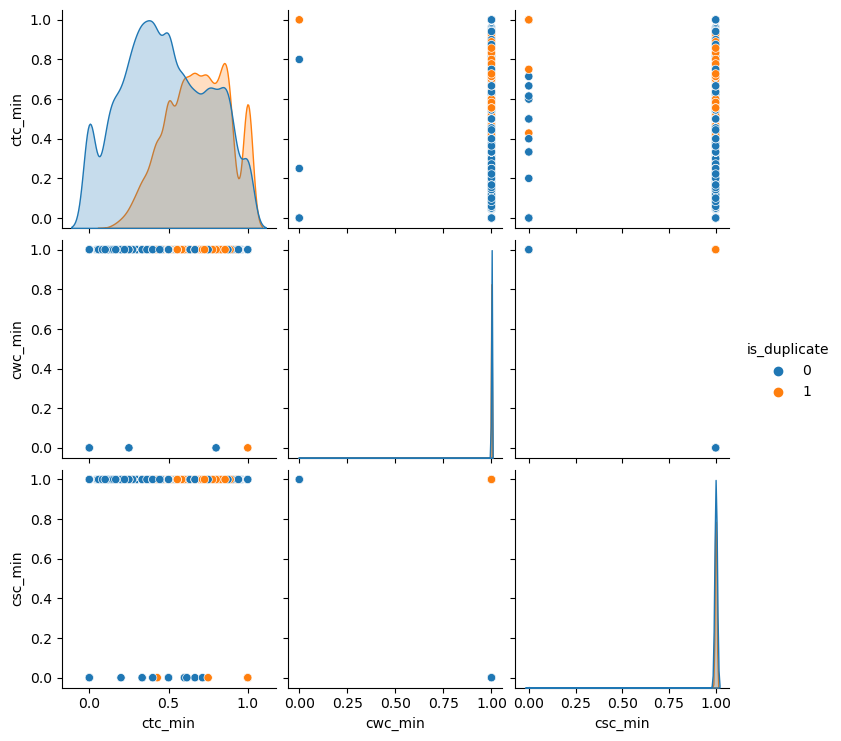

In [170]:
# now we will do some EDA using graphs 
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

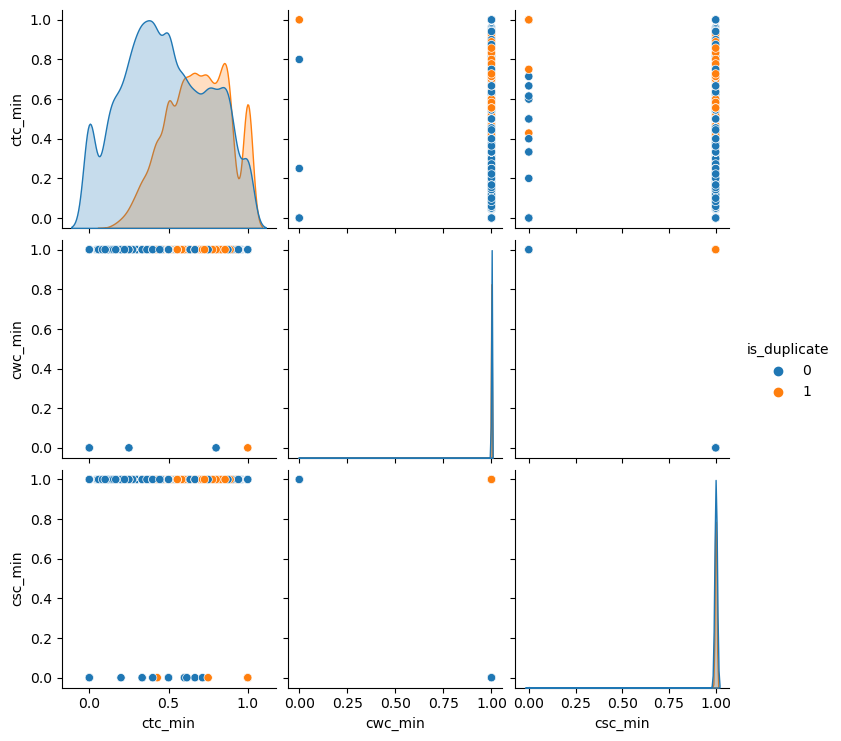

In [174]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

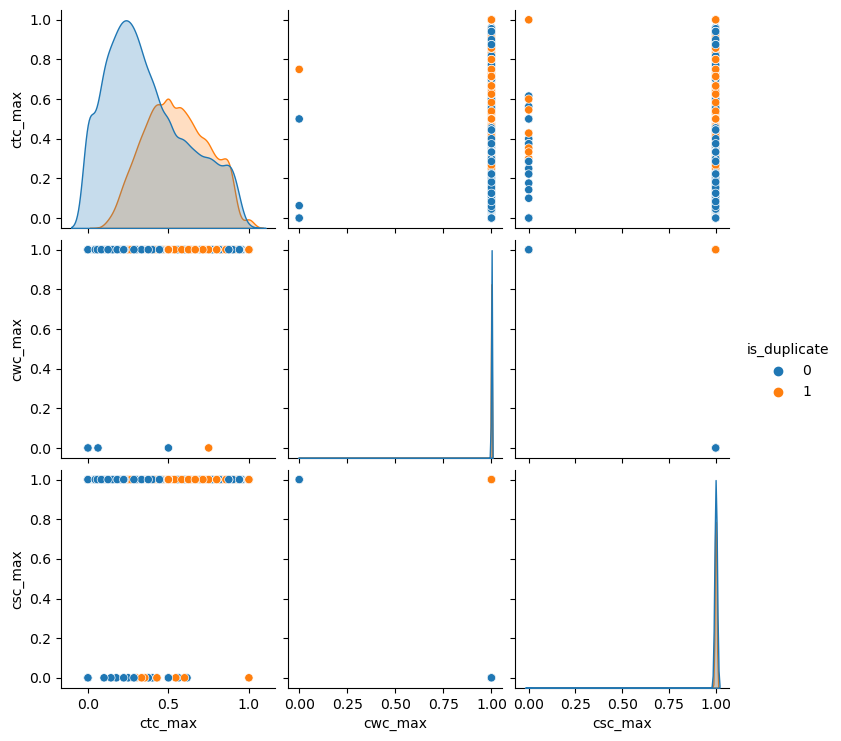

In [175]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

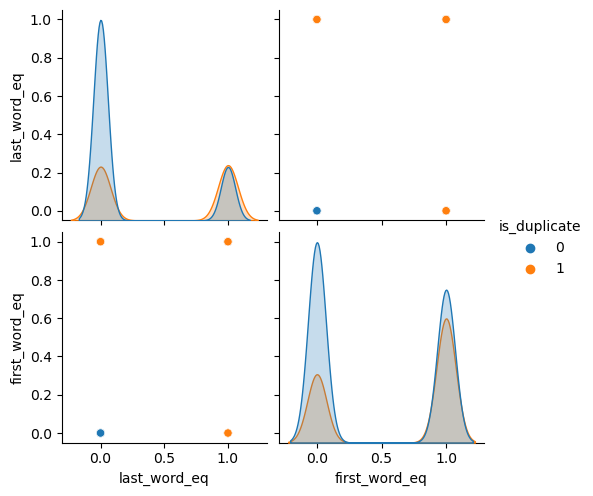

In [176]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

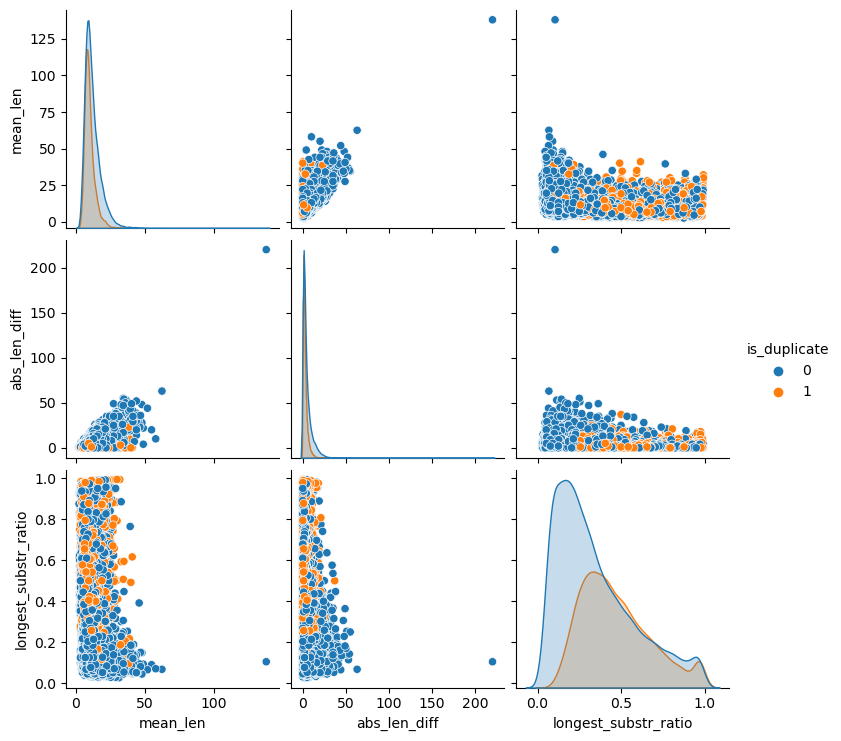

In [177]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

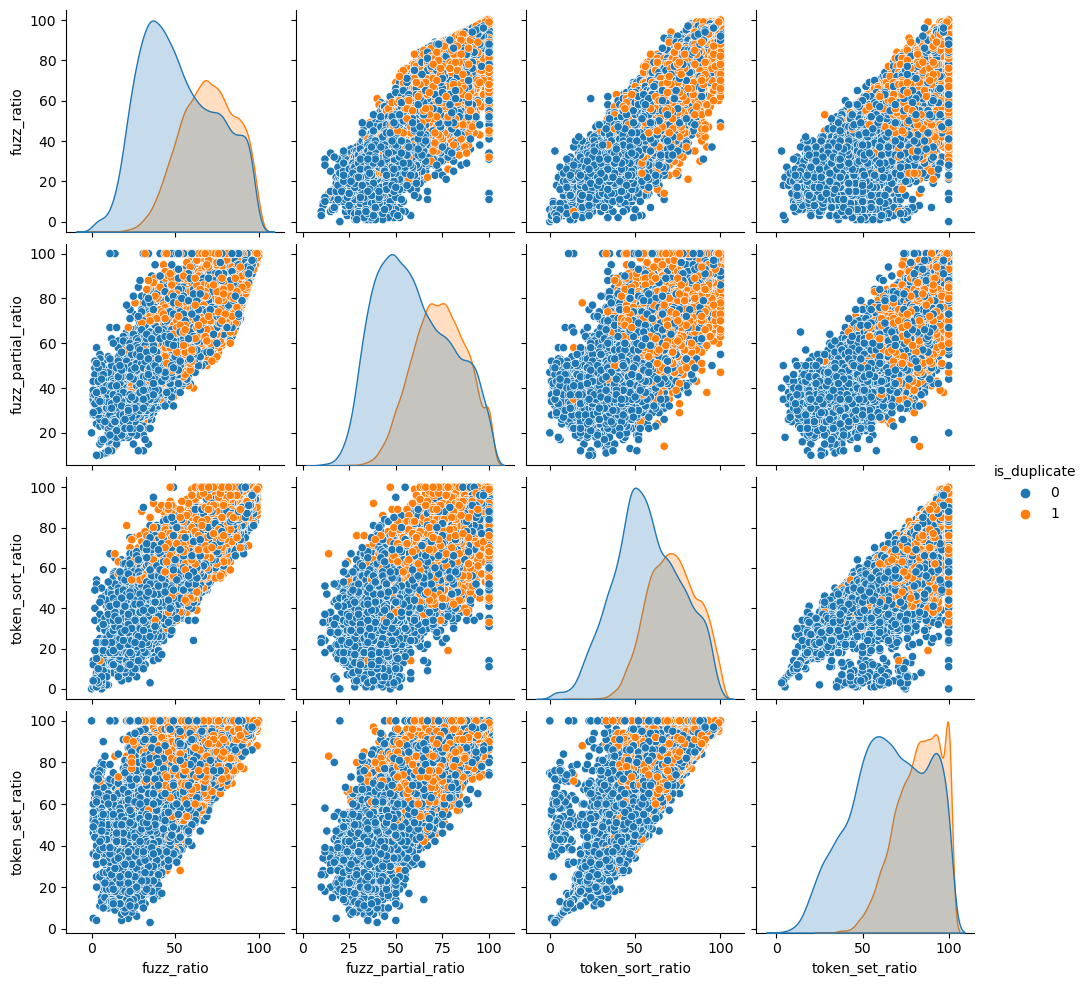

In [178]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [179]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [182]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.060s...
[t-SNE] Computed neighbors for 30000 samples in 7.056s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

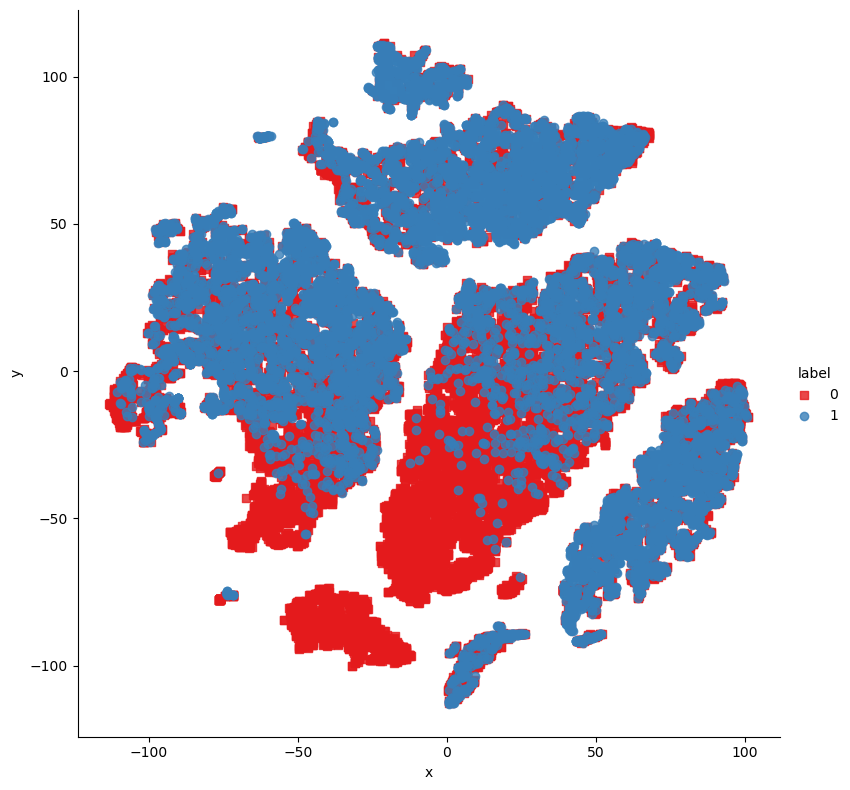

In [184]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, height=8,palette="Set1",markers=['s','o'])

In [185]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.060s...
[t-SNE] Computed neighbors for 30000 samples in 6.899s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

In [186]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [41]:
ques_df=new_df[['question1','question2']]

In [42]:
ques_df.head()

question1  \
339499  why was cyrus mistry removed as the chairman o...   
289521  by what age would you think a man should be ma...   
4665    how would an arbitrageur seek to capitalize gi...   
54203        why did quora mark my question as incomplete   
132566  what is it like working with pivotal labs as a...   

                                                question2  
339499          why did the tata sons sacked cyrus mistry  
289521  when my wrist is extended i feel a shock and b...  
4665    how would an arbitrageur seek to capitalize gi...  
54203   why does quora detect my question as an incomp...  
132566            what is it like to work at pivotal labs

In [43]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 23)


is_duplicate  q1_len  q2len  q1_num_words  q2_num_words  word_common  \
339499             1      57     41            11             8            6   
289521             0      51    104            11            23            3   
4665               0     123    122            42            42           18   
54203              1      44     59             8            10            6   
132566             0      53     39            11             9            6   

        word_total  word_share   cwc_min   cwc_max  ...   ctc_max  \
339499          19        0.32  0.999983  0.999983  ...  0.545450   
289521          33        0.09  0.999980  0.999980  ...  0.136363   
4665            38        0.47  0.999992  0.999992  ...  0.708330   
54203           18        0.33  0.999975  0.999975  ...  0.599994   
132566          20        0.30  0.999980  0.999980  ...  0.545450   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
339499             0              1             3       9.5   
289521             0              0            11      16.5   
4665               1              1             0      24.0   
54203              0              1             2       9.0   
132566             0              1             2      10.0   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
339499              0.309524          39                  46   
289521              0.115385          26                  50   
4665                0.593496         100                  99   
54203               0.355556          74                  75   
132566              0.400000          76                  85   

        token_sort_ratio  token_set_ratio  
339499                67               85  
289521                35               37  
4665                 100               99  
54203                 74               89  
132566                78               84  

[5 rows x 23 columns]

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
#merge texts
question=list(ques_df['question1'])+list(ques_df['question2'])
cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(question).toarray(),2)
#.toarray(): This method converts the sparse matrix representation obtained from cv.fit_transform() into a dense NumPy array.

In [45]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)

In [46]:
temp_df1

0     1     2     3     4     5     6     7     8     9     ...  2990  \
339499     0     0     0     0     0     0     0     0     0     0  ...     0   
289521     0     0     0     0     0     0     0     0     0     0  ...     0   
4665       0     0     0     0     0     0     0     0     0     0  ...     0   
54203      0     0     0     0     0     0     0     0     0     0  ...     0   
132566     0     0     0     0     0     0     0     0     0     0  ...     0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
228960     0     0     0     0     0     0     0     0     0     0  ...     0   
142894     0     0     0     0     0     0     0     0     0     0  ...     0   
43027      0     0     0     0     0     0     0     0     0     0  ...     0   
154198     0     0     0     0     0     0     0     0     0     0  ...     0   
174228     0     0     0     0     0     0     0     0     0     0  ...     0   

        2991  2992  2993  2994  2995  2996  2997  2998  2999  
339499     0     0     0     0     0     0     0     0     0  
289521     0     1     0     0     0     0     0     0     0  
4665       0     0     0     0     0     0     0     0     0  
54203      0     0     0     0     0     0     0     0     0  
132566     0     0     0     0     0     0     0     0     0  
...      ...   ...   ...   ...   ...   ...   ...   ...   ...  
228960     0     0     0     0     0     0     0     0     0  
142894     0     0     0     0     0     0     0     0     0  
43027      0     1     0     0     0     0     0     0     0  
154198     0     1     0     0     1     0     0     0     0  
174228     0     0     0     0     0     0     0     0     0  

[30000 rows x 3000 columns]

In [47]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
#The index is set to be the same as the index of the DataFrame ques_df.
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [48]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6023)


is_duplicate  q1_len  q2len  q1_num_words  q2_num_words  word_common  \
339499             1      57     41            11             8            6   
289521             0      51    104            11            23            3   
4665               0     123    122            42            42           18   
54203              1      44     59             8            10            6   
132566             0      53     39            11             9            6   

        word_total  word_share   cwc_min   cwc_max  ...  2990  2991  2992  \
339499          19        0.32  0.999983  0.999983  ...     0     0     0   
289521          33        0.09  0.999980  0.999980  ...     0     0     0   
4665            38        0.47  0.999992  0.999992  ...     0     0     0   
54203           18        0.33  0.999975  0.999975  ...     0     0     0   
132566          20        0.30  0.999980  0.999980  ...     0     0     0   

        2993  2994  2995  2996  2997  2998  2999  
339499     0     0     0     0     0     0     0  
289521     0     0     0     0     0     0     0  
4665       0     0     0     0     0     0     0  
54203      0     0     0     0     0     0     0  
132566     0     0     0     0     0     0     0  

[5 rows x 6023 columns]

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=2)
#final_df.iloc[:, 1:].values: This part of the code selects all rows (:) from the DataFrame final_df, and all columns starting from the second column until the last column (1:).

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.7931666666666667

In [52]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred1 = xgb.predict(x_test)
accuracy_score(y_test,y_pred1)

0.7846666666666666

In [53]:
from sklearn.metrics import confusion_matrix
# for random forest model
confusion_matrix(y_test,y_pred)

array([[3305,  505],
       [ 736, 1454]], dtype=int64)

In [54]:
# for xgboost model
confusion_matrix(y_test,y_pred1)

array([[3206,  604],
       [ 688, 1502]], dtype=int64)

In [55]:
#so by seeing confusion matrox we can that in random forest it is making less mistake 505 but in xgboost it is making more mistakes
#so we are going to consider random forest algorithm model 


# More waysto improve model :

In [56]:
#1.Increase the data 
#2.do more preprocessing 
#3.apply more algorithms 
#4.do more hypertunning
#5.make more features , we haa made 22 features but we can go for more also 
#6.instead of bag of words, we can use iftdf, word2vec, iftdf weighted word2vec
#7.if possible use deep learning (if know about deep learning)

In [57]:
# ab aage  kya karna h ki mujhe do question padkne h and rf.predict function  daalne h and then for vaah se mujhe 0ya 1 milega ,0 mtlb ki duplicate nhi h varna h duplicate hai 
#and rf.predict ko jo input chaiye vo chaiye (1,6022) means 1 row and 6022 columns (22 features+ 3000 of bow of q1+ bow of q2 ke 3000)
# and last m ye karke numpy array ka shape dena h jiska shape hoga (1,6022)

In [58]:

# we want functions which will take two argruments(q1,q2) for all the process 

In [59]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [60]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [71]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [72]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features


In [73]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [74]:
# MAIN FUNCTION FOR THAT all above steps to check q1 and q2 
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [75]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [76]:
rf.predict(query_point_creator(q1,q4))

array([1], dtype=int64)

In [77]:
cv

CountVectorizer(max_features=3000)

In [79]:
 STOP_WORDS = stopwords.words("english")

In [81]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))
pickle.dump(STOP_WORDS, open('stopwords.pkl', 'wb'))